Case Study - Spam Detection

The main aim of this project is to demonstrate the basics of Natural Language Processing (NLP).

Major Steps Involved:

1. Text Data Visualisation
2. Text Data Preprocessing
3. Text Data To Numerical Vector Conversion using Bag of Words

We will follow the steps mentioned below:

1. Data Loading
2. Exploratory Data Analysis
3. Data Preparation
 Train Test Split
 Data Preprocessing (special characters, stop words, lower case, stemming, etc)
 Converting text to numerical vector using Bag of Words
 Preprocessing Test Data
4. Training on Train Data
5. Predictions on Test Data
6. Model Evaluation

In [1]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns

Read the Data

In [2]:
df = pd.read_csv('email_data.csv')
df.head()

,Unnamed: 0,label,text,label_num
0,605,ham,Subject: enron methanol ; meter # : 988291\nth...,0
1,2349,ham,"Subject: hpl nom for january 9 , 2001\n( see a...",0
2,3624,ham,"Subject: neon retreat\nho ho ho , we ' re arou...",0
3,4685,spam,"Subject: photoshop , windows , office . cheap ...",1
4,2030,ham,Subject: re : indian springs\nthis deal is to ...,0


In [3]:
df.shape

(5171, 4)

Exploratory Data Analysis

In [4]:
df['label'].value_counts()

label
ham     3672
spam    1499
Name: count, dtype: int64

In [5]:
df['label'].value_counts(normalize=True)

label
ham     0.710114
spam    0.289886
Name: proportion, dtype: float64

<Axes: xlabel='label', ylabel='count'>

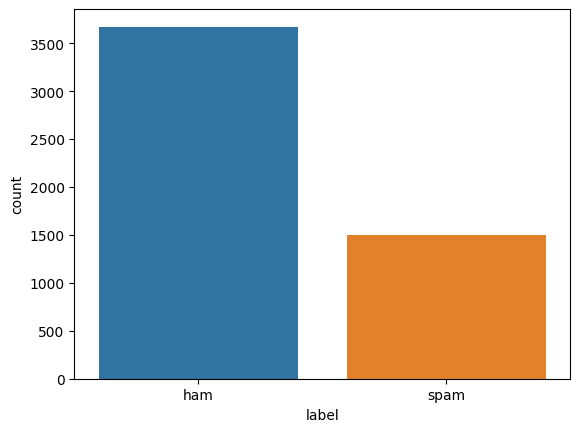

In [6]:
sns.countplot(x='label', data=df)

Data Preparation - Split the data into train and test set

In [7]:
df.columns

Index(['Unnamed: 0', 'label', 'text', 'label_num'], dtype='object')

In [9]:
df = df.drop('Unnamed: 0', axis=1)
df.head()

,label,text,label_num
0,ham,Subject: enron methanol ; meter # : 988291\nth...,0
1,ham,"Subject: hpl nom for january 9 , 2001\n( see a...",0
2,ham,"Subject: neon retreat\nho ho ho , we ' re arou...",0
3,spam,"Subject: photoshop , windows , office . cheap ...",1
4,ham,Subject: re : indian springs\nthis deal is to ...,0


In [13]:
y = df['label']
x = df[['text']]

In [14]:
# Splitting into train and test

from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x,y, test_size=0.2, random_state=42)

In [15]:
x_train.head()

,text
5132,Subject: april activity surveys\nwe are starti...
2067,Subject: message subject\nhey i ' am julie ^ _...
4716,Subject: txu fuels / sds nomination for may 20...
4710,Subject: re : richardson volumes nov 99 and de...
2268,Subject: a new era of online medical care .\na...


In [16]:
x_train.shape

(4136, 1)

Data Preparation - Text Preprocessing

In [17]:
import re
import nltk
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
from nltk.stem import WordNetLemmatizer

In [18]:
## initialize the inbuilt stemmer
stemmer = PorterStemmer()

In [19]:
## We can also use Lemmatizer instead of stemmer
lemmatizer = WordNetLemmatizer

In [20]:
def preprocess(raw_text, flag):
    # Removing special characters and digits
    sentence = re.sub("[^a-zA-Z]", " ", raw_text)

    # change sentence to lower case
    sentence = sentence.lower()

    # tokenize into words
    tokens = sentence.split()

    # remove stop word
    clean_tokens = [t for t in tokens if not t in stopwords.words('english')]

    # stemming/lemmatization
    if(flag=='stem'):
        clean_tokens = [stemmer.stem(word) for word in clean_tokens]
    else:
        clean_tokens = [lemmatizer.lemmatize(word) for word in clean_tokens]
    return pd.Series([" "].join(clean_tokens), len(clean_tokens))

In [ ]:
# %%timeit

# # Convert to series
# X_train['text'].apply(lambda x: preprocess(x, 'stem'))

# # 2min 35 sec approx run time
